# EDA

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [3]:
data = pd.read_pickle('dtm.pkl')

In [4]:
data = data.transpose()

In [5]:
data.head()

,2pac,A Tribe Called Quest,Immortal Technique,Jay-z and Kanye West,Kendrick Lamar,Logic,N.W.A.,Nas,Outkast,The Notorious B.I.G.,Tyler the Creator,Wu-Tang Clan
aa,0,0,1,0,0,1,0,0,0,0,0,0
aaaahah,0,0,0,0,0,0,0,0,0,0,0,1
aaaahhh,0,0,0,0,0,0,0,0,0,0,1,0
aah,0,0,0,0,0,0,0,0,0,0,0,1
aames,0,0,0,0,0,1,0,0,0,0,0,0


## Find top 30 words used by each artist

In [6]:
top_dict = {}
for e in data.columns:
    top = data[e].sort_values(ascending=False).head(30)
    top_dict[e] = list(zip(top.index, top.values))

In [9]:
top_dict

{'2pac': [('life', 63), ('nigga', 60), ('im', 58), ('niggas', 52), ('yeah', 47), ('got', 47), ('way', 46), ('dont', 44), ('know', 39), ('cause', 38), ('thats', 38), ('die', 36), ('ya', 34), ('fuck', 32), ('aint', 31), ('live', 28), ('come', 26), ('like', 25), ('mama', 24), ('shake', 24), ('just', 23), ('let', 23), ('thug', 23), ('gettin', 23), ('time', 22), ('love', 21), ('money', 21), ('shit', 20), ('la', 20), ('eyes', 20)], 'A Tribe Called Quest': [('buggin', 66), ('make', 48), ('gotta', 45), ('like', 39), ('girl', 38), ('relax', 37), ('settle', 36), ('dont', 35), ('got', 35), ('bonita', 35), ('qtip', 33), ('let', 33), ('check', 31), ('phife', 29), ('yo', 29), ('yall', 26), ('happen', 25), ('applebum', 25), ('kick', 24), ('cause', 23), ('youre', 23), ('just', 22), ('jazz', 20), ('somethin', 20), ('ya', 20), ('know', 19), ('yes', 19), ('time', 18), ('rhyme', 18), ('dawg', 18)], 'Immortal Technique': [('like', 72), ('cause', 49), ('im', 45), ('dont', 38), ('people', 37), ('know', 36), 

In [10]:
#add more stop words

add_stop_words = ['im','ive','dont','rza','aint','youre','ther','thats','ill','dr','ice','cube',
                 'nas','2pac','andré','gotta','tyler','creator','wanna','like','just','jayz','kanye',
                 'em','yall','cmon','uh','oh','la','ya','aa','raekwon','eazye','ren','ima','west',
                 'whats','da','ja','gon','got','gotta','imma','jay','logic','dre','inspectah','qtip',
                 'phife','hes','shes','aaaahhh','aaaahah','aah','technique','immortal','boi','biggie',
                 'notorious','uhoh','ooh', 'bastard', 'ol', 'gimme', 'kendrick', 'lamar', 'ayy','yeah']

In [12]:
#update document-term matrix with new list of stop words
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

#read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Lyrics)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

In [13]:
#pickle for later use
import pickle
pickle.dump(cv, open('cv_stop.pkl', 'wb'))
data_stop.to_pickle('dtm_stop.pkl')

In [14]:
new_dtm = data_stop.transpose()

In [15]:
top_dict_new = {}

for e in new_dtm.columns:
    top = new_dtm[e].sort_values(ascending=False).head(30)
    top_dict_new[e] = list(zip(top.index, top.values))

In [16]:
top_dict_new

{'2pac': [('life', 63), ('nigga', 60), ('niggas', 52), ('way', 46), ('know', 39), ('cause', 38), ('die', 36), ('fuck', 32), ('live', 28), ('come', 26), ('mama', 24), ('shake', 24), ('let', 23), ('thug', 23), ('gettin', 23), ('time', 22), ('money', 21), ('love', 21), ('eyes', 20), ('shit', 20), ('head', 19), ('make', 19), ('ridah', 18), ('day', 17), ('mary', 16), ('ride', 16), ('hail', 16), ('right', 16), ('goes', 16), ('motherfuckers', 16)], 'A Tribe Called Quest': [('buggin', 66), ('make', 48), ('girl', 38), ('relax', 37), ('settle', 36), ('bonita', 35), ('let', 33), ('check', 31), ('yo', 29), ('applebum', 25), ('happen', 25), ('kick', 24), ('cause', 23), ('somethin', 20), ('jazz', 20), ('yes', 19), ('know', 19), ('rhyme', 18), ('time', 18), ('dawg', 18), ('stop', 17), ('brothers', 16), ('come', 16), ('niggas', 15), ('really', 15), ('people', 14), ('man', 13), ('space', 12), ('tribe', 12), ('said', 12)], 'Immortal Technique': [('cause', 49), ('people', 37), ('know', 36), ('nigga', 33)

## Find number of unique words per artist

In [17]:
unique_list = []
for e in new_dtm.columns:
    unique = new_dtm[e].to_numpy().nonzero()[0].size
    unique_list.append(unique)

In [20]:
#dataframe for this word count
artistnames = ['Wu-Tang Clan','A Tribe Called Quest','N.W.A.','Outkast','Nas','The Notorious B.I.G.',
               '2pac','Logic','Jay-z and Kanye West','Tyler the Creator','Immortal Technique', 'Kendrick Lamar']
data_words = pd.DataFrame(list(zip(artistnames, unique_list)), columns=['Artist', 'Unique Words'])
data_unique_sort = data_words.sort_values(by='Unique Words',ascending=False)

In [21]:
data_unique_sort

,Artist,Unique Words
2,N.W.A.,1918
11,Kendrick Lamar,1766
7,Logic,1587
0,Wu-Tang Clan,1335
9,Tyler the Creator,1334
4,Nas,1281
6,2pac,1266
1,A Tribe Called Quest,1261
8,Jay-z and Kanye West,1181
5,The Notorious B.I.G.,1162


## Calculate amount of profanity per artist

In [22]:
from collections import Counter

In [23]:
Counter(top_dict_new).most_common()

[('Wu-Tang Clan', [('man', 68), ('yo', 60), ('fuckin', 51), ('wutang', 46), ('method', 45), ('bring', 43), ('niggas', 39), ('fuck', 37), ('nigga', 30), ('shit', 29), ('style', 28), ('god', 27), ('ruckus', 24), ('clan', 23), ('dollar', 23), ('motherfuckin', 22), ('kid', 22), ('dirty', 22), ('come', 19), ('word', 19), ('step', 18), ('comin', 18), ('watch', 16), ('cream', 15), ('wu', 14), ('cash', 14), ('make', 14), ('meth', 13), ('rules', 13), ('know', 13)]), ('Nas', [('love', 78), ('world', 62), ('niggas', 42), ('represent', 35), ('know', 32), ('cause', 31), ('shit', 29), ('man', 26), ('black', 20), ('ruled', 20), ('fuck', 19), ('time', 18), ('new', 18), ('life', 18), ('mind', 16), ('bitch', 16), ('son', 15), ('yo', 15), ('nigga', 15), ('state', 14), ('sleep', 14), ('york', 13), ('rock', 13), ('big', 11), ('die', 11), ('right', 10), ('id', 10), ('lifes', 10), ('plus', 9), ('imagine', 9)]), ('2pac', [('life', 63), ('nigga', 60), ('niggas', 52), ('way', 46), ('know', 39), ('cause', 38), (

In [24]:
data_swear_words = new_dtm.transpose()[['fuck','fuckin','fucking','shit','nigga','niggas','cunt',
                                     'ass','motherfucker','motherfuckers','motherfuckin','bitch','damn']]

In [26]:
#see who says which swear word most
data_profanity = pd.concat([data_swear_words.fuck,data_swear_words.fuckin,data_swear_words.fucking,
                           data_swear_words.shit,data_swear_words.nigga,data_swear_words.niggas,
                           data_swear_words.cunt,data_swear_words.ass,data_swear_words.motherfucker,
                           data_swear_words.motherfuckers,data_swear_words.motherfuckin,
                           data_swear_words.bitch,data_swear_words.damn],axis=1)

In [27]:
data_profanity

,fuck,fuckin,fucking,shit,nigga,niggas,cunt,ass,motherfucker,motherfuckers,motherfuckin,bitch,damn
2pac,32,3,0,20,60,52,0,4,6,16,10,8,1
A Tribe Called Quest,1,0,2,8,6,15,0,2,0,0,0,2,3
Immortal Technique,21,14,4,21,33,21,0,2,13,8,3,8,2
Jay-z and Kanye West,12,4,3,23,29,37,0,1,10,10,1,8,7
Kendrick Lamar,18,4,2,23,38,13,0,6,2,1,3,77,5
Logic,35,13,2,39,10,2,0,2,2,8,0,9,5
N.W.A.,135,6,11,49,67,41,0,34,20,10,5,54,6
Nas,19,4,1,29,15,42,0,7,1,1,2,16,2
Outkast,3,1,1,27,16,8,0,2,0,0,0,35,27
The Notorious B.I.G.,20,11,7,32,57,33,0,9,8,44,1,10,2


In [28]:
#find total number of swear words
data_profanity['Total'] = data_profanity.sum(axis=1)
data_profanity.index.name = 'Artist'

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

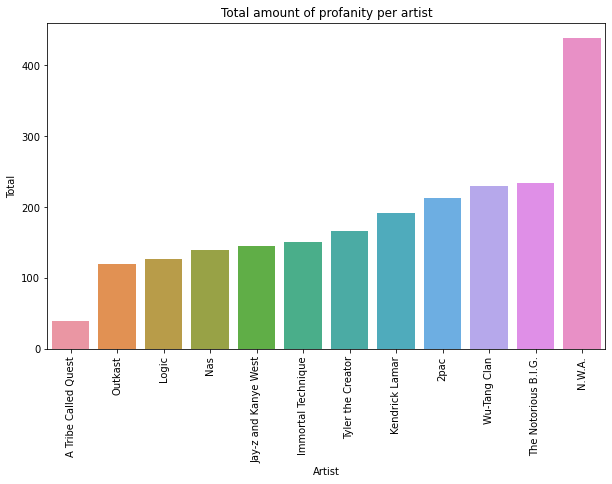

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_profanity,x=data_profanity.index,y='Total',order=data_profanity.sort_values('Total').index)
plt.title('Total amount of profanity per artist')
plt.xticks(rotation=90);

In [33]:
df = pd.read_pickle('clean-df.pkl')

## Calculate words per minute

In [34]:
songlength = ['00:04:12', '00:04:51', '00:04:47', '00:05:50', '00:05:38', '00:04:11', '00:03:36', '00:06:10', '00:02:57', '00:06:33',
              '00:02:52', '00:03:46', '00:04:10', '00:04:11', '00:03:36', '00:03:37', '00:03:49', '00:04:10', '00:05:41', '00:03:46',
              '00:05:45', '00:04:18', '00:05:36', '00:04:25', '00:06:18', '00:04:23', '00:03:10', '00:05:25', '00:03:08', '00:04:32',
              '00:03:55', '00:04:30', '00:06:09', '00:05:19', '00:03:50', '00:05:04', '00:04:00', '00:07:06', '00:04:25', '00:05:24',
              '00:04:53', '00:04:37', '00:03:30', '00:04:50', '00:03:54', '00:03:22', '00:05:25', '00:04:42', '00:04:12', '00:03:57',
              '00:05:02', '00:04:12', '00:02:50', '00:03:49', '00:03:24', '00:06:06', '00:05:19', '00:04:17', '00:04:45', '00:04:43',
              '00:05:12', '00:04:28', '00:04:22', '00:05:12', '00:04:40', '00:04:44', '00:04:38', '00:05:07', '00:05:01', '00:04:06',
              '00:04:10', '00:04:05', '00:02:47', '00:03:08', '00:02:42', '00:09:19', '00:03:23', '00:05:31', '00:03:38', '00:04:07',
              '00:03:39', '00:04:32', '00:02:58', '00:02:20', '00:05:00', '00:04:16', '00:08:23', '00:03:21', '00:04:35', '00:04:32',
              '00:04:09', '00:03:10', '00:03:00', '00:05:19', '00:04:13', '00:03:15', '00:04:15', '00:03:25', '00:04:13', '00:02:46',
              '00:09:39', '00:07:48', '00:04:01', '00:04:49', '00:05:18', '00:05:53', '00:04:28', '00:06:13', '00:03:38', '00:04:40',
             '00:02:57', '00:05:50', '00:04:07', '00:03:05', '00:06:26', '00:04:14', '00:05:10', '00:03:54', '00:03:33', '00:03:32']

df['Song Length'] = songlength

In [35]:
#time delta format so as to be able to add times together

df['Song Length'] = pd.to_timedelta(arg=df['Song Length'])

In [36]:
#add times together and group by artist

run_times = df.groupby('Artist')['Song Length'].sum()

In [37]:
run_times

Artist
2Pac                   0 days 00:47:30
A Tribe Called Quest   0 days 00:39:38
Immortal Technique     0 days 00:56:27
JAY-Z & Kanye West     0 days 00:43:36
Kendrick Lamar         0 days 00:42:48
Logic                  0 days 00:42:50
N.W.A                  0 days 00:47:00
Nas                    0 days 00:43:22
OutKast                0 days 00:49:42
The Notorious B.I.G.   0 days 00:44:27
Tyler, The Creator     0 days 00:37:45
Wu-Tang Clan           0 days 00:48:45
Name: Song Length, dtype: timedelta64[ns]

In [38]:
#convert this timedelta object back into integer so operations can be performed
#do this in seconds 
#pay attention to column order 

run_time_seconds = [2850, 2378, 3107, 2616, 2568, 2570, 2820, 2602, 2982, 2667, 2265, 2925]

In [39]:
#convert to mins 
run_time_min = []
for e in run_time_seconds:
    mintime = e / 60
    mintime = float(mintime)
    run_time_min.append(mintime)

In [57]:
#create new count vectoriser with only artist names and random sounds as stop_words for words per minute 

cv_uncut = CountVectorizer(stop_words=add_stop_words)
data_cv_uncut = cv_uncut.fit_transform(data_clean.Lyrics)
data_stop_uncut = pd.DataFrame(data_cv_uncut.toarray(), columns=cv_uncut.get_feature_names_out())
data_stop_uncut.index = data_clean.index

In [62]:
data_stop_uncut = data_stop_uncut.transpose()

In [63]:
#first find total number of words per group
total_list = []
for e in data_stop_uncut.columns:
    totals = sum(data_stop_uncut[e])
    total_list.append(totals)

In [64]:
total_list

[7131, 5494, 7837, 4147, 6138, 5881, 6544, 6078, 5351, 6272, 4605, 6489]

In [65]:
#make sure dataframe is sorted first 
data_words = data_words.sort_values(by=['Artist'])

In [66]:
#add columns to unique words dataframe
data_words['Total Words'] = total_list
data_words['Run Time (m)'] = run_time_min

In [67]:
#words per minute 

data_words['Words_per_min'] = data_words['Total Words'] / data_words['Run Time (m)']

In [68]:
data_words

,Artist,Unique Words,Total Words,Run Time (m),Words_per_min
6,2pac,1266,7131,47.500000,150.126316
1,A Tribe Called Quest,1261,5494,39.633333,138.620690
10,Immortal Technique,1104,7837,51.783333,151.342131
8,Jay-z and Kanye West,1181,4147,43.600000,95.114679
11,Kendrick Lamar,1766,6138,42.800000,143.411215
7,Logic,1587,5881,42.833333,137.299611
2,N.W.A.,1918,6544,47.000000,139.234043
4,Nas,1281,6078,43.366667,140.153728
3,Outkast,1086,5351,49.700000,107.665996
5,The Notorious B.I.G.,1162,6272,44.450000,141.102362


In [69]:
#sort by words per min
wpm_sort = data_words.sort_values(by='Words_per_min', ascending=False)
wpm_sort

,Artist,Unique Words,Total Words,Run Time (m),Words_per_min
10,Immortal Technique,1104,7837,51.783333,151.342131
6,2pac,1266,7131,47.500000,150.126316
11,Kendrick Lamar,1766,6138,42.800000,143.411215
5,The Notorious B.I.G.,1162,6272,44.450000,141.102362
4,Nas,1281,6078,43.366667,140.153728
2,N.W.A.,1918,6544,47.000000,139.234043
1,A Tribe Called Quest,1261,5494,39.633333,138.620690
7,Logic,1587,5881,42.833333,137.299611
0,Wu-Tang Clan,1335,6489,48.750000,133.107692
9,Tyler the Creator,1334,4605,37.750000,121.986755


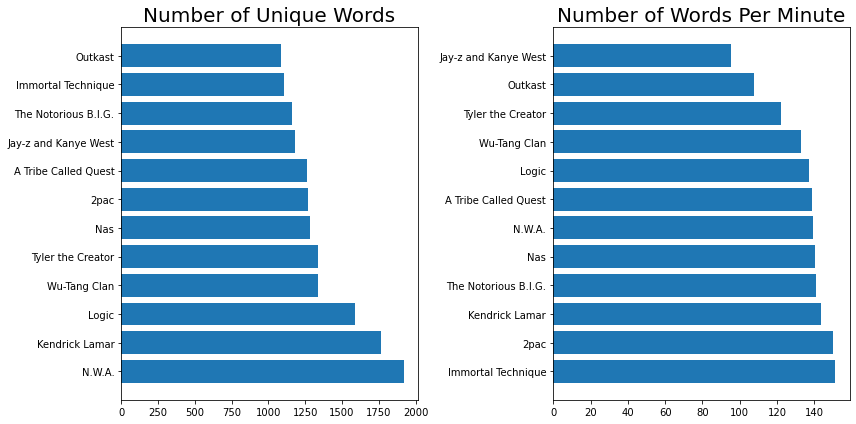

In [70]:
#plot findings
import numpy as np

y_pos = np.arange(len(data_words))
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort['Unique Words'], align='center')
plt.yticks(y_pos, data_unique_sort.Artist)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, wpm_sort.Words_per_min, align='center')
plt.yticks(y_pos, wpm_sort.Artist)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()